In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/BOAZ ADV Project/어글리어스 프로젝트

/content/drive/.shortcut-targets-by-id/1rCDkrCDgO4IZzB36IpZL4H3VcclQqykL/어글리어스 프로젝트


In [ ]:
!pip install torch
!pip install transformers==4.8.2

In [ ]:
!pip install emoji==0.6.0
!pip install soynlp==0.0.493

In [ ]:
!pip install konlpy

In [ ]:
import random
random.seed(2024)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc
import urllib.request


from tqdm import tqdm, tqdm_notebook
from glob import glob
import re
import emoji
from soynlp.normalizer import repeat_normalize
warnings.filterwarnings('ignore')
%matplotlib inline

review = pd.read_csv('./Data/Review_sentiment (Type = Order).csv')
review = review[review['Type'] == 'Order'].reset_index(drop = True)
review

,ID,Created At,Rating,document,Order ID,User ID,Photos,Type,Single Product ID,sentiment_score
0,28230,2023-10-06T02:58:55.556949,5,구독하면서 좋은 사람이 되는 것 같아요. 다양한 채소를 접하게된 것도 좋고 요리도 ...,428512.0,37457,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,98.124034
1,28255,2023-10-06T07:48:24.222539,5,반신반의 했는데 채소상태 갠찬았구요 레시피는 아직활용못해봤는데 담엔 꼭 해보려구요..ㅎ,414148.0,143572,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,97.899641
2,28291,2023-10-06T13:28:37.47401,5,매번 만족하면서 받고 있습니다 다음에도 아묻따 결제! 💚💚,429694.0,127304,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,97.728376
3,28294,2023-10-06T14:07:27.796771,5,오늘은 채소가 다 싱싱하게 와서 기분이 정말 좋아요,422690.0,144859,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,97.838066
4,14420,2023-03-13T07:38:12.302285,5,신선하고 좋아요 숙주가 색이 까매서 상한줄 알았는데 아니었네요 좋습니당,213702.0,82320,NaN,Order,NaN,97.612261
...,...,...,...,...,...,...,...,...,...,...
18485,28199,2023-10-05T23:07:11.858591,5,여름에 너무 더웠어서 음식하기 힘들어 좀 미뤄 받았었어요! 야채가 싱싱해 좋아요,342661.0,13549,NaN,Order,NaN,97.493319
18486,28204,2023-10-06T00:06:51.355204,5,아침 출근길에 현관문 열면서 어 맞다! 하면서 부랴부랴 냉장고에 집어 넣고 왔어요 ...,412108.0,135720,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,98.021448
18487,28223,2023-10-06T00:37:17.169573,5,잘 먹었어요. 레시피대로 하면되니까 편하고 다양한 요리를 할 수있어서 좋네요,404027.0,134703,NaN,Order,NaN,97.837975
18488,28224,2023-10-06T00:55:02.076614,5,오늘도 신선하게 잘 도착했어요,420765.0,66949,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,97.200751


In [ ]:
import re
import emoji
from soynlp.normalizer import repeat_normalize

emojis = ''.join(emoji.UNICODE_EMOJI.keys())
pattern = re.compile(f'[^ .,?!/@$%~％·∼()\x00-\x7Fㄱ-ㅣ가-힣{emojis}]+')
url_pattern = re.compile(
    r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)')

def clean(x):
    x = pattern.sub(' ', x)
    x = url_pattern.sub('', x)
    x = x.strip()
    x = repeat_normalize(x, num_repeats=2)
    return x

review['document'] = review['document'].apply(lambda x : clean(x))
review

In [ ]:
pos_count = len(review[review['sentiment_score'] >= 80])
neg_count = len(review[review['sentiment_score'] <= 50])

pos_count, neg_count

(16841, 1237)

In [ ]:
pos_review = review[review['sentiment_score'] >= 80].sample(neg_count)
neg_review = review[review['sentiment_score'] <= 50]

pos_review.shape, neg_review.shape

pos_review['label'] = 1
neg_review['label'] = 0

<ipython-input-10-b3d6dd197950>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_review['label'] = 0


In [ ]:
review_ = pd.concat([pos_review, neg_review])
review_

,ID,Created At,Rating,document,Order ID,User ID,Photos,Type,Single Product ID,sentiment_score,label
11477,17091,2023-04-21T06:42:25.09114,5,늘 신선한 야채 너무 좋습니다 이번에 옥수수 넘 맛있었어요,223007.0,58196,NaN,Order,NaN,97.925432,1
11758,17436,2023-04-26T04:36:54.877881,5,신선하고 2인가정에 알맞은 적당한 양이 배송와서 너무좋아요. 어글리어스 덕분에 신선...,251401.0,99474,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,97.981541,1
16024,24120,2023-08-01T02:44:51.670656,5,집에 있는 시간이 많아져 요리에 자연스레 관심이 가서 구매했습니다. 여러 야채들과 ...,359964.0,128151,NaN,Order,NaN,98.134669,1
5577,12943,2023-02-15T01:59:00.824308,5,뭐 항상 만족하는 편입니다! 그런데 2인 가구에 당근이 3개나 와서ㅠㅠㅠ 좀 더 나...,175083.0,49830,NaN,Order,NaN,93.515017,1
1054,12543,2023-02-03T13:12:01.937187,5,잘먹었습니다. 감사합니다!!,161744.0,34463,NaN,Order,NaN,90.829135,1
...,...,...,...,...,...,...,...,...,...,...,...
18350,28016,2023-10-01T00:11:19.420957,3,다른 채소들은...겉보기에도 괜찮은데.. 사과는... 하아.....정말 2주연속.....,419439.0,94198,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,2.196499,0
18358,28058,2023-10-02T07:37:45.368367,3,상품 상태는 대체로 만족하나 사과가 너무 맛이 없었어요 과일은 맛도중요한데 조금더 ...,432297.0,148865,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,4.922165,0
18378,28054,2023-10-02T07:30:04.065503,5,계란 계속 넣어주시면 좋겠습니다!!,303378.0,50755,NaN,Order,NaN,7.733176,0
18416,28095,2023-10-02T12:02:52.165399,5,좋아요좋아요좋아요좋아요 좋아요좋아요좋아요좋아요,420231.0,48535,NaN,Order,NaN,49.122898,0


<h1> 가설 1. TF-IDF + okt로 하면 군집화가 잘 되려나? </h1>
결론 : 잘 안됌

In [ ]:
!pip install PyKomoran

In [ ]:
from konlpy.tag import Okt
from tqdm import tqdm

stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다', '것', '엔', '접', '있다']
okt = Okt()

tokenized_sentence = []
for sentence in tqdm(review['document']):
    tokenized = okt.pos(sentence)
    stopword_removed = [word[0] for word in tokenized if word[1] in ['Noun', 'Verb', 'Adjective'] and word[0] not in stopwords]
    tokenized_sentence.append(' '.join(stopword_removed))

review['morph_document'] = tokenized_sentence

100%|██████████| 2474/2474 [00:25<00:00, 98.68it/s] 


In [ ]:
okt.pos('구독하면서 좋은 사람이 되는 것 같아요')

[('구독', 'Noun'),
 ('하면서', 'Verb'),
 ('좋은', 'Adjective'),
 ('사람', 'Noun'),
 ('이', 'Josa'),
 ('되는', 'Verb'),
 ('것', 'Noun'),
 ('같아요', 'Adjective')]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfv = TfidfVectorizer(max_df = 0.9, min_df = 10)
tfidfv.fit(review['morph_document'])
tfidfv_transform = tfidfv.transform(review['morph_document'])
tfidfv_transform.shape

(2474, 611)

In [ ]:
invert_index_vectorizer = {v: k for k, v in tfidfv.vocabulary_.items()}
invert_index_vectorizer

{419: '요리',
 570: '하게',
 123: '되어서',
 15: '같아요',
 430: '이번',
 381: '어떤',
 148: '만들어',
 575: '하는',
 110: '도전',
 16: '같은',
 170: '매일',
 36: '고민',
 595: '해요',
 58: '글리',
 383: '어스',
 535: '채소',
 232: '배달',
 120: '되니',
 471: '재료',
 318: '식단',
 452: '있어',
 144: '마음',
 132: '들어요',
 141: '레시피',
 252: '보니',
 287: '새로운',
 451: '있습니다',
 519: '주도',
 226: '받았어요',
 91: '다양하게',
 223: '받아서',
 507: '좋아요',
 320: '식탁',
 587: '항상',
 522: '주문',
 592: '해서',
 173: '먹고',
 540: '최고',
 108: '덕분',
 572: '하기',
 557: '토마토',
 80: '넣어',
 184: '먹었어요',
 523: '주변',
 542: '추천',
 313: '시작',
 502: '좋고',
 609: '활용',
 503: '좋네요',
 520: '주로',
 473: '저녁',
 1: '가구',
 29: '격주',
 443: '일주일',
 495: '조금',
 308: '시간',
 112: '동안',
 118: '되는',
 284: '상품',
 282: '상추',
 414: '왔네요',
 399: '열무',
 159: '맛있게',
 589: '해먹',
 181: '먹었네요',
 227: '받은',
 39: '과일',
 531: '진짜',
 109: '도움',
 334: '싱싱하고',
 183: '먹었습니다',
 155: '많아서',
 105: '대체',
 129: '두부',
 423: '유기농',
 530: '직접',
 46: '구매',
 538: '처음',
 199: '못난이',
 588: '해도',
 336: '싱싱한',
 283: '

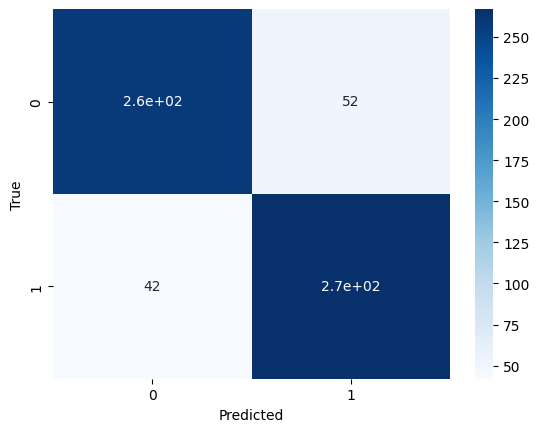

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

X = tfidfv_transform.copy()
y = review['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

model = LogisticRegression(C = 1)
model.fit(X_train, y_train)
lr_train_pred = model.predict(X_train)
lr_test_pred = model.predict(X_test)

cm = confusion_matrix(y_test, lr_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
train_accuracy = accuracy_score(y_train, lr_train_pred)
test_accuracy = accuracy_score(y_test, lr_test_pred)
precision = precision_score(y_test, lr_test_pred, average = 'macro')
recall = recall_score(y_test, lr_test_pred, average = 'macro')
f1 = f1_score(y_test, lr_test_pred, average = 'macro')

print('train and test accuracy: {0:.4f}, {1:.4f}'.format(train_accuracy, test_accuracy))
print('precision: %.4f' % precision)
print('recall: %.4f' % recall)
print('F1: %.4f' % f1)

train and test accuracy: 0.8922, 0.8481
precision: 0.8485
recall: 0.8482
F1: 0.8481


In [ ]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(model.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(model.coef_[0])), reverse = False)
for coef in coef_pos_index[:50]:
    print(invert_index_vectorizer[coef[1]], coef[0])

레시피 2.439622077814596
신선하고 2.4315584375405273
먹었어요 2.170247513853729
좋았어요 2.1632884649882147
맛있어요 2.1525010642063314
싱싱하고 2.122399475525544
요리 2.009091959232168
주도 1.8871101758872153
다양한 1.8075758828163255
해먹 1.7745877020044127
덕분 1.7514182396012221
싱싱한 1.7457226192114625
좋네요 1.6592331740282087
도착 1.6243666635462977
좋고 1.621315003090096
아주 1.6064047957979373
신선한 1.5781602637098788
좋습니다 1.5604327051527895
좋은 1.5536382817301262
구성 1.4825358640658715
있습니다 1.4770764043879019
받았습니다 1.4663331418534578
항상 1.460357697577608
싱싱해서 1.387008335702591
만족 1.381036636478044
건강 1.3733549847945872
맛있게 1.3637444609286997
있어서 1.336456735360585
재료 1.329338069456216
먹었습니다 1.326500910311369
채소 1.2899674048687457
신선해서 1.2758795886584713
새벽 1.2553793911403186
좋아서 1.2463845564702811
만족해요 1.23407069321873
맛있었어요 1.2007554482613663
싱싱하게 1.1706560468820832
신선하게 1.168693458348769
제철 1.1640425074179848
기대 1.152359457912655
만족스러워요 1.1421643841301679
두부 1.1408291382944074
넣어 1.1383441209194998
볶음 1.1338024003166411
맛있

In [ ]:
for coef in coef_neg_index[:50]:
    print(invert_index_vectorizer[coef[1]], coef[0])

실망 -2.119715110153789
다른 -1.769648926467852
상태 -1.7234934469933276
고구마 -1.7177296904649735
벌레 -1.6838537650533818
신선도 -1.6049836294246769
곰팡이 -1.5861463150706576
좋겠어요 -1.5691870326765056
나머지 -1.5610595548754385
별로 -1.468138885732457
사과 -1.4450140291784836
보니 -1.3942628919270905
다음 -1.3682834001935043
상품 -1.3274917224307197
그냥 -1.3069704456789202
버렸어요 -1.2507164446955223
아쉬워요 -1.2466883092605991
조금 -1.2431336646096722
문제 -1.222379016901331
아쉬웠어요 -1.2114431329000754
작고 -1.2091824846881847
점보 -1.1982581106418475
취소 -1.1809883167023827
오이 -1.1797353631752567
정도 -1.1380743371215076
키위 -1.1337093320710097
상해 -1.130966825782256
왔네요 -1.1141399379801784
그런지 -1.110580790925727
가격 -1.0982314778756814
썩은 -1.0848787053542768
비슷한 -1.0797043238667356
비해 -1.0786227390117324
터져서 -1.038293994041124
구독 -1.0298907000109638
아니라 -1.0061138545465265
부분 -0.9809433341614967
하나 -0.9759322474019234
다른건 -0.9723979057220904
물러서 -0.9675402741211065
좋지 -0.9596961150419688
배송비 -0.9511306597592177
아이스팩 -0.950970656294

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


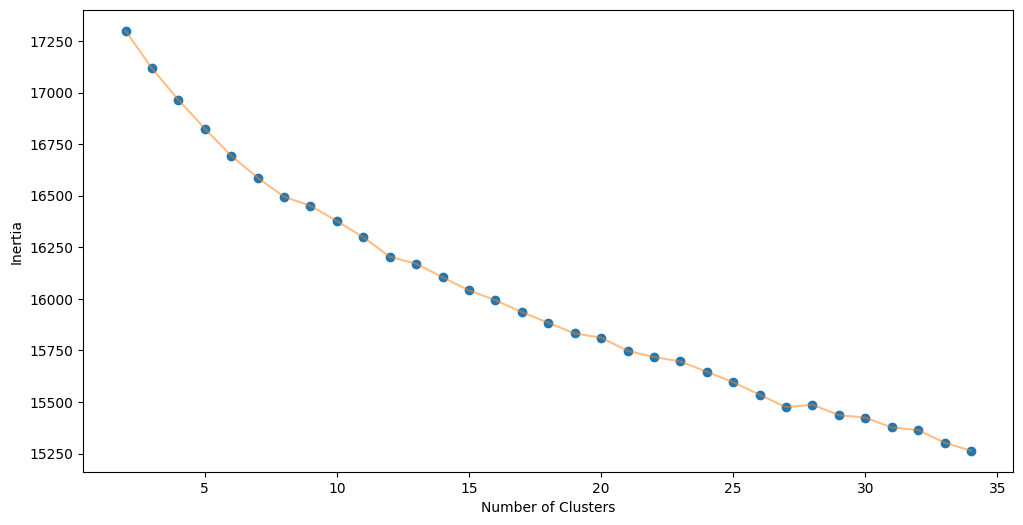

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# k에 따라 inertia_(군집 내 거리제곱합의 합)이 어떻게 변하는 지 시각화
def change_n_clusters(n_clusters, data):
    sum_of_squared_distance = []
    for n_cluster in n_clusters:
        kmeans = KMeans(n_clusters=n_cluster)
        kmeans.fit(data)
        sum_of_squared_distance.append(kmeans.inertia_)

    plt.figure(1 , figsize = (12, 6))
    plt.plot(n_clusters , sum_of_squared_distance , 'o')
    plt.plot(n_clusters , sum_of_squared_distance , '-' , alpha = 0.5)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')

n_clusters = range(2, 35)
change_n_clusters(n_clusters, tfidfv_transform)

<h1> 2. 어글리어스 데이터로 감정분석 실행해보기 </h1>
기존 : 네이버 영화리뷰 + 쇼핑 리뷰 기반
변경 : 어글리어스 리뷰 18,000개 중에서 긍정리뷰와 부정 리뷰를 나눠서 학습데이터에 적용

In [ ]:
MODEL_NAME = {'electra':'kykim/electra-kor-base', 'funnel':'kykim/funnel-kor-base'}
SAVE_PATH = './weight'
NUM_CLASSES = 2
N_FOLD = 5
MAX_LEN = 50
BATCH_SIZE = 64
EPOCHS = 10
LEARNING_RATE = 2e-5
LABEL_SMOOTHING = 0.05
SEED = 2022

In [ ]:
import re
import emoji
from soynlp.normalizer import repeat_normalize

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup
from transformers import AutoTokenizer, AutoModelForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'현재 device는 {device}입니다.')

## accuracy 계산
def accuracy(true, pred):
    return sum(true == pred) / len(true)

현재 device는 cuda입니다.


In [ ]:
def seed_everything(seed: int = 2024):
    import random, os
    import numpy as np
    import torch

    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(SEED) ## 재현을 위한 seed 고정

In [ ]:
class CustomDataset(Dataset):

    def __init__(self, dataset, tokenizer, max_len, train_mode=True):
        self.dataset = dataset
        self.max_len = max_len
        self.train_mode = train_mode
        self.tokenizer = tokenizer

    def __getitem__(self, idx):
        text = self.dataset.loc[idx, 'document']
        inputs = self.tokenizer(
            text,
            return_tensors='pt',
            truncation=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            add_special_tokens=True
            )

        input_ids = inputs['input_ids'][0]
        attention_mask = inputs['attention_mask'][0]

        if self.train_mode:
            label = self.dataset.loc[idx, 'label']
            return input_ids, attention_mask, label
        return input_ids, attention_mask

    def __len__(self):
        return len(self.dataset)

In [ ]:
class EarlyStopping:

    """주어진 patience 이후로 validation loss가 개선되지 않으면 학습을 조기 중지"""
    def __init__(self, patience=7, verbose=False, delta=0, path='./weight', model_name='', n_fold=1):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.val_acc = 0
        self.delta = delta
        self.path = path
        self.model_name = model_name
        self.n_fold = n_fold

    def __call__(self, model, val_loss, val_acc):

        score = -val_loss ## val_loss는 작을수록 좋다 ## score는 0에 가까울수록 좋다

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, val_acc, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            # print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience: ## 만약 loss가 개선되지 않은 스탭이 patience보다 크거나 같아진다면 조기중단
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, val_acc, model)
            self.counter = 0 ## loss가 개선되었으므로 0으로 초기화

    def save_checkpoint(self, val_loss, val_acc, model):
        """validation loss가 감소하면 모델을 저장"""
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.5f} -> {val_loss:.5f})  Saving model ...')
        torch.save(model.state_dict(), self.path + f'/{self.model_name}_best_{self.n_fold}.pt')
        self.val_loss_min = val_loss ## 모델이 더 좋게 갱신되었으므로 이때의 valid loss를 기준치로 변경
        self.val_acc = val_acc ## 이때의 valid accuracy도 변경해준다

In [ ]:
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=N_FOLD, shuffle=True, random_state=SEED)
loss_fn = nn.CrossEntropyLoss(label_smoothing=LABEL_SMOOTHING)

In [ ]:
def train(model, dataloader, optimizer, loss_fn, scheduler=None):
    model.train()
    train_avg_loss = 0  ## 에폭별 배치단위 평균 훈련 오차
    train_total_batch = len(dataloader)  ## 배치 크기

    for input_ids, attention_masks, y in tqdm_notebook(dataloader):  ## 미니 배치 단위로 꺼내온다
        input_ids = input_ids.to(device)
        attention_masks = attention_masks.to(device)
        y = y.to(device)

        optimizer.zero_grad()  ## 그래디언트 초기화
        yhat = model(input_ids, attention_masks)[0]  ## y_hat을 구한다
        loss = loss_fn(yhat, y).to(device)  ## train loss 계산
        loss.backward()  ## 미분
        optimizer.step()  ## 업데이트
        train_avg_loss += (loss.item() / train_total_batch)  ## 각 배치마다 훈련 오차 누적

        ## batch마다 학습률 조절
        if scheduler is not None:
            scheduler.step()

    return model, train_avg_loss

In [ ]:
def evaluate(model, dataloader, loss_fn):
    """dataloader의 데이터를 사용하여 모델에 대한 epoch 하나당 batch들의 평균 평가 오차와 평가 정확도를 반환"""
    valid_avg_acc, valid_avg_loss = 0, 0

    model.eval()
    with torch.no_grad():
        for input_ids, attention_masks, y in tqdm_notebook(dataloader):
            input_ids = input_ids.to(device)
            attention_masks = attention_masks.to(device)
            y = y.to(device)

            yhat = model(input_ids, attention_masks)[0]
            loss = loss_fn(yhat, y) ## valid loss
            acc = accuracy(y.cpu().data.numpy(), yhat.cpu().data.numpy().argmax(-1))
            valid_avg_acc += (acc * len(y) / len(dataloader.dataset))
            valid_avg_loss += loss.item() / len(dataloader)

    return valid_avg_loss, valid_avg_acc

In [ ]:
def kfold_training(data, target, skfold, model_type, loss_fn):
    seed_everything(SEED)  ## 정확한 loss 재현을 위함
    model_avg_acc = []  ## fold 마다 valid셋의 평균 정확도
    model_avg_loss = []  ## fold 마다 valid셋의 평균 손실
    model_epoch_train_loss = [[] for _ in range(N_FOLD)]  ## fold 마다 train의 한 epoch당 valid의 배치 평균 손실
    model_epoch_valid_loss = [[] for _ in range(N_FOLD)]  ## fold 마다 valid의 한 epoch당 valid의 배치 평균 손실

    ## 모델과 토크나이저
    model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME[model_type], num_labels=NUM_CLASSES).to(device)
    tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME[model_type])
    default_weight_path = f'./Data/{model_type}_default_weight.pt'
    torch.save(model.state_dict(), default_weight_path)

    for i, (train_idx, valid_idx) in enumerate(skfold.split(data, target)):
        gc.collect()
        torch.cuda.empty_cache()
        print(f'[{i + 1} / {N_FOLD}] Fold Training......')

        train_data = data.iloc[train_idx].reset_index().drop('index', axis=1)
        valid_data = data.iloc[valid_idx].reset_index().drop('index', axis=1)

        ## 사전학습된 가중치를 불러온다
        model.load_state_dict(torch.load(default_weight_path, map_location=device))

        ## Dataset, Dataloader
        train_dataset = CustomDataset(train_data, tokenizer, MAX_LEN, train_mode=True)
        valid_dataset = CustomDataset(valid_data, tokenizer, MAX_LEN, train_mode=True)

        train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
        valid_dataloader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=True)

        ## early stopping
        early_stopping = EarlyStopping(patience=1,
                                       verbose=False,
                                       path=SAVE_PATH,
                                       model_name=model_type,
                                       n_fold=i+1)  ## patience 횟수 에폭후에도 valid loss가 작아지지 않으면 조기 중단

        ## optimizer
        optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)  ## transformer의 AdamW, 옵티마이저에 최적화할 파라미터와 학습률 전달

        ## scheduler
        t_total = len(train_dataloader) * EPOCHS  ## The total number of training steps
        warmup_step = int(t_total * 0.1)  ## The number of steps for the warmup phase
        scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

        ## fold 마다 모델 학습
        for epoch in range(EPOCHS):
            model, train_avg_loss = train(model, train_dataloader, optimizer, loss_fn, scheduler)
            valid_avg_loss, valid_avg_acc = evaluate(model, valid_dataloader, loss_fn)
            model_epoch_train_loss[i].append(train_avg_loss)  ## i번째 fold의 에폭 하나당 평균 배치 훈련 오차
            model_epoch_valid_loss[i].append(valid_avg_loss)  ## i번째 fold의 에폭 하나당 평균 배치 평가 오차

            if epoch % 1 == 0 or epoch == EPOCHS - 1:
                print('[Epoch: {:>3}] train loss = {:>.5}  valid loss = {:>.5}  valid acc = {:>.5}'.format(epoch + 1, train_avg_loss, valid_avg_loss, valid_avg_acc))

            ## epoch 마다 early stopping 실행
            early_stopping(model, valid_avg_loss, valid_avg_acc)
            if early_stopping.early_stop:
                if epoch % 1 != 0 and epoch != EPOCHS - 1:
                    print('[Epoch: {:>3}] train loss = {:>.5}  valid loss = {:>.5}  valid acc = {:>.5}'.format(epoch + 1, train_avg_loss, valid_avg_loss, valid_avg_acc))
                print('Early stopping!')
                break

        model_avg_acc.append(early_stopping.val_acc)  ## fold 마다 loss가 가장 작은 모델의 정확도
        model_avg_loss.append(early_stopping.val_loss_min)  ## fold 마다 loss가 가장 작은 모델의 손실

        ## fold 마다 평가 루프 종료시 가장 작은 loss와 이때의 accuracy를 출력
        print(f'{i + 1} Fold -> Best Valid Loss: {early_stopping.val_loss_min:.4f}  Best Valid Accuracy: {early_stopping.val_acc:.4f}\n\n')

    ## 마지막으로 fold 마다 가장 loss가 작은 모델들의 평균 정확도와 평균 손실을 출력
    print(f'{skfold.n_splits} Fold Mean Valid Accuracy: {np.mean(model_avg_acc):.4f}')
    print(f'{skfold.n_splits} Fold Mean Valid Loss: {np.mean(model_avg_loss):.4f}')

    return model, model_epoch_train_loss, model_epoch_valid_loss, model_avg_acc, model_avg_loss

In [ ]:
review_

,ID,Created At,Rating,document,Order ID,User ID,Photos,Type,Single Product ID,sentiment_score,label
11477,17091,2023-04-21T06:42:25.09114,5,늘 신선한 야채 너무 좋습니다 이번에 옥수수 넘 맛있었어요,223007.0,58196,NaN,Order,NaN,97.925432,1
11758,17436,2023-04-26T04:36:54.877881,5,신선하고 2인가정에 알맞은 적당한 양이 배송와서 너무좋아요. 어글리어스 덕분에 신선...,251401.0,99474,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,97.981541,1
16024,24120,2023-08-01T02:44:51.670656,5,집에 있는 시간이 많아져 요리에 자연스레 관심이 가서 구매했습니다. 여러 야채들과 ...,359964.0,128151,NaN,Order,NaN,98.134669,1
5577,12943,2023-02-15T01:59:00.824308,5,뭐 항상 만족하는 편입니다! 그런데 2인 가구에 당근이 3개나 와서ㅠㅠㅠ 좀 더 나...,175083.0,49830,NaN,Order,NaN,93.515017,1
1054,12543,2023-02-03T13:12:01.937187,5,잘먹었습니다. 감사합니다!!,161744.0,34463,NaN,Order,NaN,90.829135,1
...,...,...,...,...,...,...,...,...,...,...,...
18350,28016,2023-10-01T00:11:19.420957,3,다른 채소들은...겉보기에도 괜찮은데.. 사과는... 하아.....정말 2주연속.....,419439.0,94198,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,2.196499,0
18358,28058,2023-10-02T07:37:45.368367,3,상품 상태는 대체로 만족하나 사과가 너무 맛이 없었어요 과일은 맛도중요한데 조금더 ...,432297.0,148865,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,4.922165,0
18378,28054,2023-10-02T07:30:04.065503,5,계란 계속 넣어주시면 좋겠습니다!!,303378.0,50755,NaN,Order,NaN,7.733176,0
18416,28095,2023-10-02T12:02:52.165399,5,좋아요좋아요좋아요좋아요 좋아요좋아요좋아요좋아요,420231.0,48535,NaN,Order,NaN,49.122898,0


In [ ]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()

label = review_['label']
eletra_model, _, _, _, _ = kfold_training(review_, label, skfold, 'electra', loss_fn)

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at kykim/electra-kor-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[1 / 5] Fold Training......


  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

[Epoch:   1] train loss = 0.66819  valid loss = 0.58909  valid acc = 0.79596


  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

[Epoch:   2] train loss = 0.38823  valid loss = 0.21513  valid acc = 0.96162


  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

[Epoch:   3] train loss = 0.20079  valid loss = 0.20054  valid acc = 0.9596


  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

[Epoch:   4] train loss = 0.16548  valid loss = 0.19866  valid acc = 0.96364


  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

[Epoch:   5] train loss = 0.14395  valid loss = 0.19284  valid acc = 0.96768


  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

[Epoch:   6] train loss = 0.13512  valid loss = 0.2006  valid acc = 0.96768
Early stopping!
1 Fold -> Best Valid Loss: 0.1928  Best Valid Accuracy: 0.9677


[2 / 5] Fold Training......


  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

[Epoch:   1] train loss = 0.67152  valid loss = 0.59365  valid acc = 0.85051


  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

[Epoch:   2] train loss = 0.40351  valid loss = 0.24797  valid acc = 0.93737


  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

[Epoch:   3] train loss = 0.21059  valid loss = 0.21318  valid acc = 0.95556


  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

[Epoch:   4] train loss = 0.1789  valid loss = 0.21152  valid acc = 0.95758


  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

[Epoch:   5] train loss = 0.17015  valid loss = 0.2043  valid acc = 0.96566


  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

[Epoch:   6] train loss = 0.16388  valid loss = 0.21173  valid acc = 0.96162
Early stopping!
2 Fold -> Best Valid Loss: 0.2043  Best Valid Accuracy: 0.9657


[3 / 5] Fold Training......


  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

[Epoch:   1] train loss = 0.66964  valid loss = 0.57778  valid acc = 0.85859


  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

[Epoch:   2] train loss = 0.38436  valid loss = 0.2183  valid acc = 0.96364


  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

[Epoch:   3] train loss = 0.20844  valid loss = 0.20017  valid acc = 0.96364


  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

[Epoch:   4] train loss = 0.16908  valid loss = 0.19989  valid acc = 0.97172


  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

[Epoch:   5] train loss = 0.14359  valid loss = 0.20142  valid acc = 0.96566
Early stopping!
3 Fold -> Best Valid Loss: 0.1999  Best Valid Accuracy: 0.9717


[4 / 5] Fold Training......


  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

[Epoch:   1] train loss = 0.66839  valid loss = 0.58858  valid acc = 0.84646


  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

[Epoch:   2] train loss = 0.39012  valid loss = 0.21353  valid acc = 0.9697


  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

[Epoch:   3] train loss = 0.21598  valid loss = 0.20704  valid acc = 0.96162


  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

[Epoch:   4] train loss = 0.17586  valid loss = 0.18458  valid acc = 0.96566


  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

[Epoch:   5] train loss = 0.15644  valid loss = 0.1828  valid acc = 0.97172


  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

[Epoch:   6] train loss = 0.14522  valid loss = 0.20531  valid acc = 0.96364
Early stopping!
4 Fold -> Best Valid Loss: 0.1828  Best Valid Accuracy: 0.9717


[5 / 5] Fold Training......


  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

[Epoch:   1] train loss = 0.66962  valid loss = 0.58994  valid acc = 0.82996


  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

[Epoch:   2] train loss = 0.39179  valid loss = 0.23944  valid acc = 0.95344


  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

[Epoch:   3] train loss = 0.19862  valid loss = 0.24435  valid acc = 0.94737
Early stopping!
5 Fold -> Best Valid Loss: 0.2394  Best Valid Accuracy: 0.9534


5 Fold Mean Valid Accuracy: 0.9660
5 Fold Mean Valid Loss: 0.2039


In [ ]:
def predict(model_type, dataloader, weight_save_path, is_prob=False) -> np.array:
    """저장된 모델의 가중치를 불러와서 dataloader의 각 데이터를 예측하여 반환"""
    model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME[model_type], num_labels=NUM_CLASSES).to(device)
    weight_path_list = glob(weight_save_path + '/*.pt')
    test_probs = np.zeros(shape=(len(dataloader.dataset), 2))

    weight_path_list = ['./weight/electra_best_4.pt']
    for weight in tqdm(weight_path_list):
        if model_type not in weight:
            continue

        model.load_state_dict(torch.load(weight, map_location=device))
        model.eval()
        probs = None

        with torch.no_grad():
            for input_ids, attention_masks in dataloader:
                input_ids = input_ids.to(device)
                attention_masks = attention_masks.to(device)

                outputs = model(input_ids, attention_masks)[0]
                outputs = outputs.cpu().numpy()

                if probs is None:
                    probs = outputs
                else:
                    probs = np.concatenate([probs, outputs])

        test_probs += (probs / 1)
    _, test_preds = torch.max(torch.tensor(test_probs), dim=1) ## 최대값과 인덱스

    if is_prob:
        return test_probs ## 각 컬럼별 확률
    return test_preds ## 라벨

In [ ]:
test = pd.read_csv('./Data/Review.csv')
test.rename(columns = {'Content' : 'document'}, inplace = True)

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME['electra'], num_labels=NUM_CLASSES).to(device)
print(model)

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at kykim/electra-kor-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ElectraForSequenceClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(42000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0-11): 12 x ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): L

In [ ]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()


electra_tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME['electra'])

test_dataset = CustomDataset(review, electra_tokenizer, MAX_LEN, train_mode = False)
test_dataloader = DataLoader(test_dataset, batch_size = BATCH_SIZE, shuffle = False)

preds = predict('electra', test_dataloader, SAVE_PATH, is_prob = True)

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at kykim/electra-kor-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 1/1 [00:57<00:00, 57.22s/it]


In [ ]:
def softmax(x):
    exp_x = np.exp(x)
    sum_exp_x = np.sum(exp_x, axis=1, keepdims=True)
    return exp_x / sum_exp_x

predict_proba = softmax(preds)
positive_ = predict_proba[:, 1]
positive_

review['modified_score'] = positive_ * 100
review

,ID,Created At,Rating,document,Order ID,User ID,Photos,Type,Single Product ID,sentiment_score,modified_score
0,28230,2023-10-06T02:58:55.556949,5,구독하면서 좋은 사람이 되는 것 같아요. 다양한 채소를 접하게된 것도 좋고 요리도 ...,428512.0,37457,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,98.124034,97.537843
1,28255,2023-10-06T07:48:24.222539,5,반신반의 했는데 채소상태 갠찬았구요 레시피는 아직활용못해봤는데 담엔 꼭 해보려구요..ㅎ,414148.0,143572,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,97.899641,97.450673
2,28291,2023-10-06T13:28:37.47401,5,매번 만족하면서 받고 있습니다 다음에도 아묻따 결제! 💚💚,429694.0,127304,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,97.728376,97.639260
3,28294,2023-10-06T14:07:27.796771,5,오늘은 채소가 다 싱싱하게 와서 기분이 정말 좋아요,422690.0,144859,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,97.838066,97.480931
4,14420,2023-03-13T07:38:12.302285,5,신선하고 좋아요 숙주가 색이 까매서 상한줄 알았는데 아니었네요 좋습니당,213702.0,82320,NaN,Order,NaN,97.612261,97.006683
...,...,...,...,...,...,...,...,...,...,...,...
18485,28199,2023-10-05T23:07:11.858591,5,여름에 너무 더웠어서 음식하기 힘들어 좀 미뤄 받았었어요! 야채가 싱싱해 좋아요,342661.0,13549,NaN,Order,NaN,97.493319,97.500365
18486,28204,2023-10-06T00:06:51.355204,5,아침 출근길에 현관문 열면서 어 맞다! 하면서 부랴부랴 냉장고에 집어 넣고 왔어요 ...,412108.0,135720,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,98.021448,97.364498
18487,28223,2023-10-06T00:37:17.169573,5,잘 먹었어요. 레시피대로 하면되니까 편하고 다양한 요리를 할 수있어서 좋네요,404027.0,134703,NaN,Order,NaN,97.837975,97.596468
18488,28224,2023-10-06T00:55:02.076614,5,오늘도 신선하게 잘 도착했어요,420765.0,66949,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,97.200751,97.439038


In [ ]:
positive = review[review['sentiment_score'] >= 80].sample(100)
neutral = review[(review['sentiment_score'] >= 30) & (review['sentiment_score'] < 75)].sample(200)
negative = review[review['sentiment_score'] < 20].sample(100)

positive.to_csv('./Data/긍정 샘플 100개 추출.csv', index = False)
neutral.to_csv('./Data/중립 샘플 200개 추출.csv', index = False)
negative.to_csv('./Data/부정 샘플 100개 추출.csv', index = False)

In [ ]:
review.to_csv('./Data/Review_sentiment (Type = Order) (Updated in 1224).csv', index = False)

<h1> 3. 리포트용 End-to-End 만들기</h1>

<h3> 1. Previous 작업 </h3>

In [ ]:
review['Created At'].dtype

dtype('O')

In [ ]:
review['Created At']

0        2023-10-06T02:58:55.556949
1        2023-10-06T07:48:24.222539
2         2023-10-06T13:28:37.47401
3        2023-10-06T14:07:27.796771
4        2023-03-13T07:38:12.302285
                    ...            
18485    2023-10-05T23:07:11.858591
18486    2023-10-06T00:06:51.355204
18487    2023-10-06T00:37:17.169573
18488    2023-10-06T00:55:02.076614
18489    2023-10-06T00:58:09.505265
Name: Created At, Length: 18490, dtype: object

In [ ]:
review['Created At'] = pd.to_datetime(review['Created At'], format = '%Y-%m-%d')
review['Created At']

0       2023-10-06 02:58:55.556949
1       2023-10-06 07:48:24.222539
2       2023-10-06 13:28:37.474010
3       2023-10-06 14:07:27.796771
4       2023-03-13 07:38:12.302285
                   ...            
18485   2023-10-05 23:07:11.858591
18486   2023-10-06 00:06:51.355204
18487   2023-10-06 00:37:17.169573
18488   2023-10-06 00:55:02.076614
18489   2023-10-06 00:58:09.505265
Name: Created At, Length: 18490, dtype: datetime64[ns]

In [ ]:
review['year'] = review['Created At'].dt.year
review['week'] = review['Created At'].dt.week
review

,ID,Created At,Rating,document,Order ID,User ID,Photos,Type,Single Product ID,sentiment_score,modified_score,year,week
0,28230,2023-10-06 02:58:55.556949,5,구독하면서 좋은 사람이 되는 것 같아요. 다양한 채소를 접하게된 것도 좋고 요리도 ...,428512.0,37457,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,98.124034,97.537843,2023,40
1,28255,2023-10-06 07:48:24.222539,5,반신반의 했는데 채소상태 갠찬았구요 레시피는 아직활용못해봤는데 담엔 꼭 해보려구요..ㅎ,414148.0,143572,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,97.899641,97.450673,2023,40
2,28291,2023-10-06 13:28:37.474010,5,매번 만족하면서 받고 있습니다 다음에도 아묻따 결제! 💚💚,429694.0,127304,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,97.728376,97.639260,2023,40
3,28294,2023-10-06 14:07:27.796771,5,오늘은 채소가 다 싱싱하게 와서 기분이 정말 좋아요,422690.0,144859,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,97.838066,97.480931,2023,40
4,14420,2023-03-13 07:38:12.302285,5,신선하고 좋아요 숙주가 색이 까매서 상한줄 알았는데 아니었네요 좋습니당,213702.0,82320,NaN,Order,NaN,97.612261,97.006683,2023,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18485,28199,2023-10-05 23:07:11.858591,5,여름에 너무 더웠어서 음식하기 힘들어 좀 미뤄 받았었어요! 야채가 싱싱해 좋아요,342661.0,13549,NaN,Order,NaN,97.493319,97.500365,2023,40
18486,28204,2023-10-06 00:06:51.355204,5,아침 출근길에 현관문 열면서 어 맞다! 하면서 부랴부랴 냉장고에 집어 넣고 왔어요 ...,412108.0,135720,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,98.021448,97.364498,2023,40
18487,28223,2023-10-06 00:37:17.169573,5,잘 먹었어요. 레시피대로 하면되니까 편하고 다양한 요리를 할 수있어서 좋네요,404027.0,134703,NaN,Order,NaN,97.837975,97.596468,2023,40
18488,28224,2023-10-06 00:55:02.076614,5,오늘도 신선하게 잘 도착했어요,420765.0,66949,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,97.200751,97.439038,2023,40


In [ ]:
review.groupby('year')['week'].agg(['mean', 'min', 'max', 'nunique'])

,mean,min,max,nunique
year,,,,
2020,46.500000,46,47,2
2021,33.091270,3,52,45
2022,32.582766,1,52,52
2023,24.589472,1,52,46


In [ ]:
review['cumsum_week'] = 0

review['cumsum_week'] = (review['year'] - 2021) * 52 + review['week'] + 3
review.loc[(review['year'] == 2020) & (review['week'] == 46), 'cumsum_week'] = 1

review

,ID,Created At,Rating,document,Order ID,User ID,Photos,Type,Single Product ID,sentiment_score,modified_score,year,week,cumsum_week
0,28230,2023-10-06 02:58:55.556949,5,구독하면서 좋은 사람이 되는 것 같아요. 다양한 채소를 접하게된 것도 좋고 요리도 ...,428512.0,37457,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,98.124034,97.537843,2023,40,147
1,28255,2023-10-06 07:48:24.222539,5,반신반의 했는데 채소상태 갠찬았구요 레시피는 아직활용못해봤는데 담엔 꼭 해보려구요..ㅎ,414148.0,143572,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,97.899641,97.450673,2023,40,147
2,28291,2023-10-06 13:28:37.474010,5,매번 만족하면서 받고 있습니다 다음에도 아묻따 결제! 💚💚,429694.0,127304,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,97.728376,97.639260,2023,40,147
3,28294,2023-10-06 14:07:27.796771,5,오늘은 채소가 다 싱싱하게 와서 기분이 정말 좋아요,422690.0,144859,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,97.838066,97.480931,2023,40,147
4,14420,2023-03-13 07:38:12.302285,5,신선하고 좋아요 숙주가 색이 까매서 상한줄 알았는데 아니었네요 좋습니당,213702.0,82320,NaN,Order,NaN,97.612261,97.006683,2023,11,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18485,28199,2023-10-05 23:07:11.858591,5,여름에 너무 더웠어서 음식하기 힘들어 좀 미뤄 받았었어요! 야채가 싱싱해 좋아요,342661.0,13549,NaN,Order,NaN,97.493319,97.500365,2023,40,147
18486,28204,2023-10-06 00:06:51.355204,5,아침 출근길에 현관문 열면서 어 맞다! 하면서 부랴부랴 냉장고에 집어 넣고 왔어요 ...,412108.0,135720,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,98.021448,97.364498,2023,40,147
18487,28223,2023-10-06 00:37:17.169573,5,잘 먹었어요. 레시피대로 하면되니까 편하고 다양한 요리를 할 수있어서 좋네요,404027.0,134703,NaN,Order,NaN,97.837975,97.596468,2023,40,147
18488,28224,2023-10-06 00:55:02.076614,5,오늘도 신선하게 잘 도착했어요,420765.0,66949,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,97.200751,97.439038,2023,40,147


In [ ]:
review['sentiment_label'] = review['sentiment_score'].apply(lambda x : '긍정' if x >= 50 else '부정')
review['sentiment_label'].value_counts(normalize = True)

긍정    0.933099
부정    0.066901
Name: sentiment_label, dtype: float64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


================== 요청해주신 주차의 리뷰에 대한 분석 결과입니다. ====================

2023년의 22주차부터 24주차까지의 분석 결과입니다.
리뷰 수는 999개이며, 3주 전 대비 191개가 많습니다
평균 감정 점수는 92.47점이며, 3주 전 대비 0.57점이 하락하였습니다.
긍정 리뷰의 비율은  95.10%이며, 3주 전 대비 0.82%만큼 하락하였습니다.
아래는 최근 10주간의 감정 점수의 추이입니다.


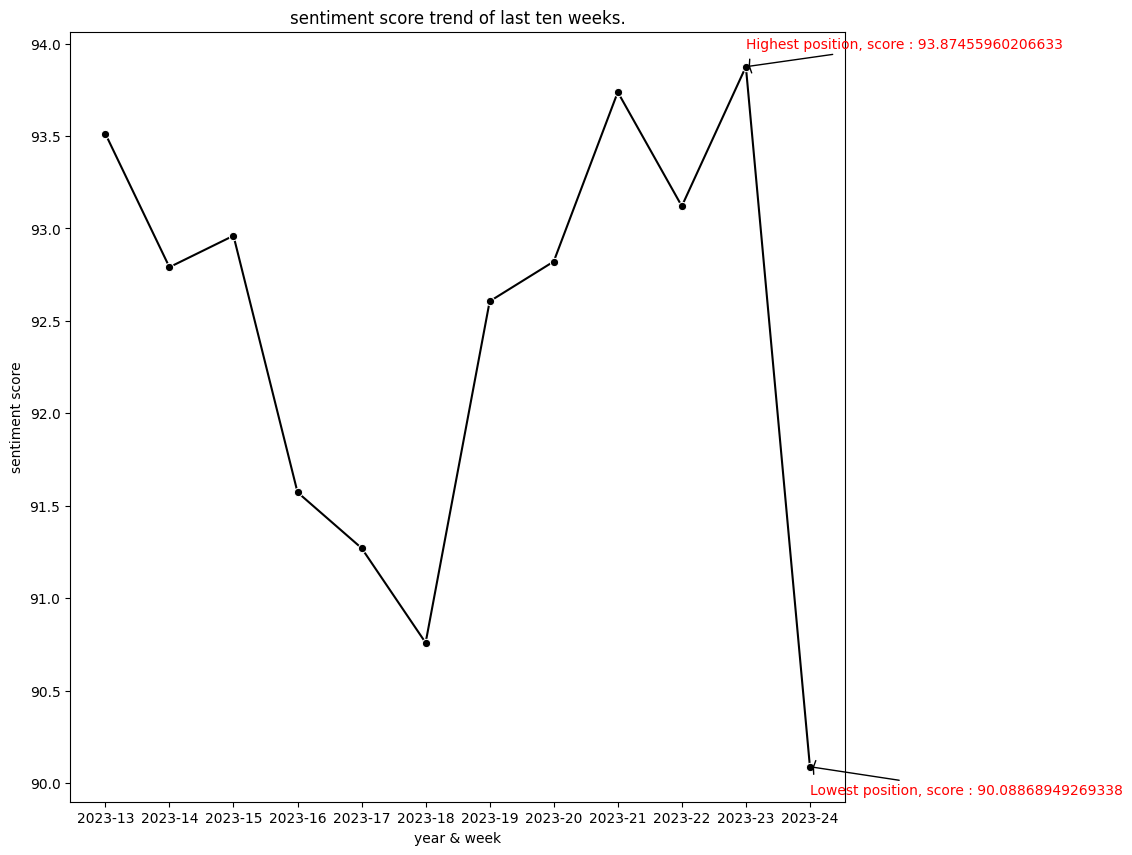

In [ ]:
class Report:

    def __init__(self, review, year, range):
        self.review = review
        self.year = year
        self.range = range

    def get_report_by_week(self):
        max = (self.year - 2021) * 52 + self.range[1] + 3
        min = (self.year - 2021) * 52 + self.range[0] + 3
        interval = max - min + 1

        comparison_target = (self.review['cumsum_week'] >= min) & (self.review['cumsum_week'] <= max)
        comparison_preview = (self.review['cumsum_week'] >= min - interval) & (self.review['cumsum_week'] <= max - interval)

        filter_target = self.review[comparison_target]
        filter_preview = self.review[comparison_preview]
        target_count = len(filter_target)
        target_preview = len(filter_preview)
        change_count = target_count - target_preview

        target_score = round(np.mean(filter_target['sentiment_score']), 2)
        preview_score = round(np.mean(filter_preview['sentiment_score']), 2)
        change_score = round(target_score - preview_score, 2)

        target_positive_ratio = round(len(filter_target[filter_target['sentiment_label'] == '긍정']) / len(filter_target), 4) * 100
        preview_positive_ratio = round(len(filter_preview[filter_preview['sentiment_label'] == '긍정']) / len(filter_preview), 4) * 100
        change_ratio = round(target_positive_ratio - preview_positive_ratio, 2)

        review_count_message = f'리뷰 수는 {len(filter_target)}개이며, {interval}주 전 대비 {change_count if (change_count) > 0 else change_count *(-1)}개가 ' + ('많습니다' if change_count > 0 else '적습니다')
        score_message = f'평균 감정 점수는 {target_score}점이며, {interval}주 전 대비 {change_score if (change_score) > 0 else change_score * (-1)}점이 ' + ('상승하였습니다' if change_score > 0 else '하락하였습니다.')
        ratio_message = f'긍정 리뷰의 비율은 {target_positive_ratio : .2f}%이며, {interval}주 전 대비 {change_ratio if (change_ratio) > 0 else change_ratio * (-1)}%만큼 ' + ('상승하였습니다' if change_ratio > 0 else '하락하였습니다.')

        print('================== 요청해주신 주차의 리뷰에 대한 분석 결과입니다. ====================\n')
        print(f'{self.year}년의 {self.range[0]}주차부터 {self.range[1]}주차까지의 분석 결과입니다.')
        print(review_count_message)
        print(score_message)
        print(ratio_message)
        print('아래는 최근 10주간의 감정 점수의 추이입니다.')
        self.get_plot(min, max)

    def get_report_card(self):
        self.get_report_by_week()

    def get_plot(self, min, max):
        plt.figure(figsize = (10, 10))
        min = min - 9
        trend = self.calculate_trend(min, max)
        trend['x_axis'] = trend['year'] + '-' + trend['week']
        min_score, max_score = np.min(trend['sentiment_score']), np.max(trend['sentiment_score'])
        min_axis, max_axis = trend[trend['sentiment_score'] == min_score]['x_axis'], trend[trend['sentiment_score'] == max_score]['x_axis']

        sns.lineplot(x = trend['x_axis'], y = trend['sentiment_score'], marker = 'o', color = 'black')
        plt.xlabel('year & week')
        plt.ylabel('sentiment score')
        plt.title('sentiment score trend of last ten weeks.')
        plt.annotate('Lowest position, score : ' + str(min_score), xy = (min_axis, min_score), xytext = (min_axis, min_score - 0.15),
                    arrowprops = dict(facecolor = 'red', arrowstyle = '->, head_length = 0.1, head_width = 0.5'), color = 'red')
        plt.annotate('Highest position, score : ' + str(max_score), xy = (max_axis, max_score), xytext = (max_axis, max_score + 0.1),
                    arrowprops = dict(facecolor = 'red', arrowstyle = '->, head_length = 0.1, head_width = 0.5'), color = 'red')

        #plt.text(min_axis, min_score - 0.15, 'Lowest position.', fontsize = 13, ha = 'center', va = 'bottom', color = 'red')
        #plt.text(max_axis, max_score + 0.1, 'Highest position.', fontsize = 13, ha = 'center', va = 'bottom', color = 'red')
        plt.show()

    def calculate_trend(self, min, max):
        filter = self.review[(review['cumsum_week'] >= min) & (self.review['cumsum_week'] <= max)]
        sentiment_trend = filter.groupby('cumsum_week')[['year', 'week', 'sentiment_score']].agg('mean')
        sentiment_trend['year'] = sentiment_trend['year'].astype(int).astype(str)
        sentiment_trend['week'] = sentiment_trend['week'].astype(int).astype(str)
        return sentiment_trend.reset_index()



report = Report(review, 2023, [22, 24])
report.get_report_card()

In [ ]:
review.to_csv('./Data/Review_sentiment (Type = Order), end-to-end 추가 (Updated 1226).csv')

================== 요청해주신 주차의 리뷰에 대한 분석 결과입니다. ====================
2023년의 33 주차부터 34 주차까지의 분석 결과입니다.

평균 감정 점수는 89.2점이며, 1주 전 대비 1.46점이 하락하였습니다.
긍정 리뷰의 비율은 92.44%이며, 1주 전 대비 0.36%만큼 하락하였습니다.
아래는 최근 10주간의 감정 점수의 추이입니다.


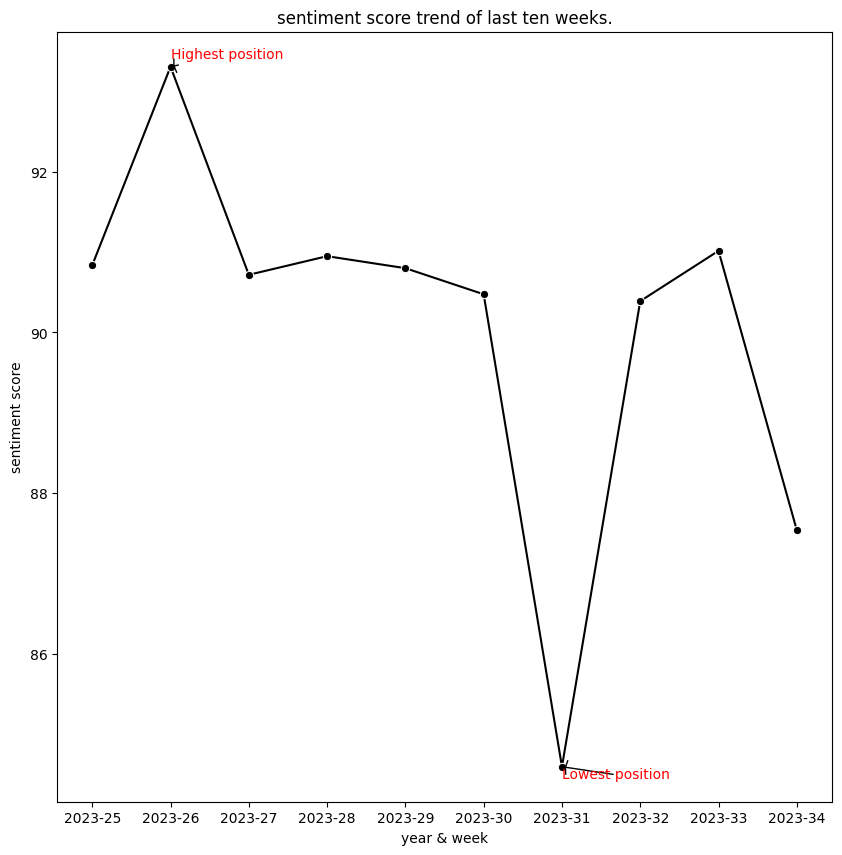

In [ ]:
def get_report_by_week(year, range):
    max = (year - 2021) * 52 + range[1] + 3
    min = (year - 2021) * 52 + range[0] + 3
    interval = max - min

    comparison_target = (review['cumsum_week'] >= min) & (review['cumsum_week'] <= max)
    comparison_preview = (review['cumsum_week'] >= min - interval) & (review['cumsum_week'] <= max - interval)

    filter_target = review[comparison_target]
    filter_preview = review[comparison_preview]

    target_score = round(np.mean(filter_target['sentiment_score']), 2)
    preview_score = round(np.mean(filter_preview['sentiment_score']), 2)
    change_score = round(target_score - preview_score, 2)

    target_positive_ratio = round(len(filter_target[filter_target['sentiment_label'] == '긍정']) / len(filter_target), 4) * 100
    preview_positive_ratio = round(len(filter_preview[filter_preview['sentiment_label'] == '긍정']) / len(filter_preview), 4) * 100
    change_ratio = round(target_positive_ratio - preview_positive_ratio, 2)

    score_message = f'평균 감정 점수는 {target_score}점이며, {interval}주 전 대비 {change_score if (change_score) > 0 else change_score * (-1)}점이 ' + ('상승하였습니다' if change_score > 0 else '하락하였습니다.')
    ratio_message = f'긍정 리뷰의 비율은 {target_positive_ratio}%이며, {interval}주 전 대비 {change_ratio if (change_ratio) > 0 else change_ratio * (-1)}%만큼 ' + ('상승하였습니다' if change_ratio > 0 else '하락하였습니다.')

    print('================== 요청해주신 주차의 리뷰에 대한 분석 결과입니다. ====================')
    print(f'{year}년의 {range[0]} 주차부터 {range[1]} 주차까지의 분석 결과입니다.\n')
    print(score_message)
    print(ratio_message)
    print('아래는 최근 10주간의 감정 점수의 추이입니다.')
    get_plot(min, max)

def get_plot(min, max):
    plt.figure(figsize = (10, 10))
    min = min - 8
    trend = calculate_trend(min, max)
    trend['x_axis'] = trend['year'] + '-' + trend['week']
    min_score, max_score = np.min(trend['sentiment_score']), np.max(trend['sentiment_score'])
    min_axis, max_axis = trend[trend['sentiment_score'] == min_score]['x_axis'], trend[trend['sentiment_score'] == max_score]['x_axis']

    sns.lineplot(x = trend['x_axis'], y = trend['sentiment_score'], marker = 'o', color = 'black')
    plt.xlabel('year & week')
    plt.ylabel('sentiment score')
    plt.title('sentiment score trend of last ten weeks.')
    plt.annotate('Lowest position', xy = (min_axis, min_score), xytext = (min_axis, min_score - 0.15),
                 arrowprops = dict(facecolor = 'red', arrowstyle = '->, head_length = 0.1, head_width = 0.5'), color = 'red')
    plt.annotate('Highest position', xy = (max_axis, max_score), xytext = (max_axis, max_score + 0.1),
                 arrowprops = dict(facecolor = 'red', arrowstyle = '->, head_length = 0.1, head_width = 0.5'), color = 'red')

    #plt.text(min_axis, min_score - 0.15, 'Lowest position.', fontsize = 13, ha = 'center', va = 'bottom', color = 'red')
    #plt.text(max_axis, max_score + 0.1, 'Highest position.', fontsize = 13, ha = 'center', va = 'bottom', color = 'red')
    plt.show()

def calculate_trend(min, max):
    filter = review[(review['cumsum_week'] >= min) & (review['cumsum_week'] <= max)]
    sentiment_trend = filter.groupby('cumsum_week')[['year', 'week', 'sentiment_score']].agg('mean')
    sentiment_trend['year'] = sentiment_trend['year'].astype(int).astype(str)
    sentiment_trend['week'] = sentiment_trend['week'].astype(int).astype(str)
    return sentiment_trend.reset_index()



get_report_by_week(2023, [33, 34])

<h1> 4. Topic Modeling 통해 리뷰 카테고리화 진행 </h1>


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc
import urllib.request


from tqdm import tqdm, tqdm_notebook
from glob import glob

warnings.filterwarnings('ignore')
%matplotlib inline

review = pd.read_csv('./Data/Review_sentiment (Type = Order), end-to-end 추가 (Updated 1226).csv')
review

,Unnamed: 0,ID,Created At,Rating,document,Order ID,User ID,Photos,Type,Single Product ID,sentiment_score,modified_score,year,week,cumsum_week,sentiment_label
0,0,28230,2023-10-06 02:58:55.556949,5,구독하면서 좋은 사람이 되는 것 같아요. 다양한 채소를 접하게된 것도 좋고 요리도 ...,428512.0,37457,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,98.124034,97.537843,2023,40,147,긍정
1,1,28255,2023-10-06 07:48:24.222539,5,반신반의 했는데 채소상태 갠찬았구요 레시피는 아직활용못해봤는데 담엔 꼭 해보려구요..ㅎ,414148.0,143572,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,97.899641,97.450673,2023,40,147,긍정
2,2,28291,2023-10-06 13:28:37.474010,5,매번 만족하면서 받고 있습니다 다음에도 아묻따 결제! 💚💚,429694.0,127304,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,97.728376,97.639260,2023,40,147,긍정
3,3,28294,2023-10-06 14:07:27.796771,5,오늘은 채소가 다 싱싱하게 와서 기분이 정말 좋아요,422690.0,144859,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,97.838066,97.480931,2023,40,147,긍정
4,4,14420,2023-03-13 07:38:12.302285,5,신선하고 좋아요 숙주가 색이 까매서 상한줄 알았는데 아니었네요 좋습니당,213702.0,82320,NaN,Order,NaN,97.612261,97.006683,2023,11,118,긍정
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18485,18485,28199,2023-10-05 23:07:11.858591,5,여름에 너무 더웠어서 음식하기 힘들어 좀 미뤄 받았었어요! 야채가 싱싱해 좋아요,342661.0,13549,NaN,Order,NaN,97.493319,97.500365,2023,40,147,긍정
18486,18486,28204,2023-10-06 00:06:51.355204,5,아침 출근길에 현관문 열면서 어 맞다! 하면서 부랴부랴 냉장고에 집어 넣고 왔어요 ...,412108.0,135720,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,98.021448,97.364498,2023,40,147,긍정
18487,18487,28223,2023-10-06 00:37:17.169573,5,잘 먹었어요. 레시피대로 하면되니까 편하고 다양한 요리를 할 수있어서 좋네요,404027.0,134703,NaN,Order,NaN,97.837975,97.596468,2023,40,147,긍정
18488,18488,28224,2023-10-06 00:55:02.076614,5,오늘도 신선하게 잘 도착했어요,420765.0,66949,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,97.200751,97.439038,2023,40,147,긍정


In [ ]:
review['document']

0        구독하면서 좋은 사람이 되는 것 같아요. 다양한 채소를 접하게된 것도 좋고 요리도 ...
1         반신반의 했는데 채소상태 갠찬았구요 레시피는 아직활용못해봤는데 담엔 꼭 해보려구요..ㅎ
2                         매번 만족하면서 받고 있습니다 다음에도 아묻따 결제! 💚💚
3                             오늘은 채소가 다 싱싱하게 와서 기분이 정말 좋아요
4                  신선하고 좋아요 숙주가 색이 까매서 상한줄 알았는데 아니었네요 좋습니당
                               ...                        
18485         여름에 너무 더웠어서 음식하기 힘들어 좀 미뤄 받았었어요! 야채가 싱싱해 좋아요
18486    아침 출근길에 현관문 열면서 어 맞다! 하면서 부랴부랴 냉장고에 집어 넣고 왔어요 ...
18487           잘 먹었어요. 레시피대로 하면되니까 편하고 다양한 요리를 할 수있어서 좋네요
18488                                     오늘도 신선하게 잘 도착했어요
18489              배송은 빠르고 정확했는데 사과가 약간 단맛이 없네요 요즘 사과가 그런듯
Name: document, Length: 18490, dtype: object

In [ ]:
review = review.drop_duplicates(subset = ['User ID', 'document']).reset_index(drop = True)
review

,Unnamed: 0,ID,Created At,Rating,document,Order ID,User ID,Photos,Type,Single Product ID,sentiment_score,modified_score,year,week,cumsum_week,sentiment_label
0,0,28230,2023-10-06 02:58:55.556949,5,구독하면서 좋은 사람이 되는 것 같아요. 다양한 채소를 접하게된 것도 좋고 요리도 ...,428512.0,37457,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,98.124034,97.537843,2023,40,147,긍정
1,1,28255,2023-10-06 07:48:24.222539,5,반신반의 했는데 채소상태 갠찬았구요 레시피는 아직활용못해봤는데 담엔 꼭 해보려구요..ㅎ,414148.0,143572,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,97.899641,97.450673,2023,40,147,긍정
2,2,28291,2023-10-06 13:28:37.474010,5,매번 만족하면서 받고 있습니다 다음에도 아묻따 결제! 💚💚,429694.0,127304,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,97.728376,97.639260,2023,40,147,긍정
3,3,28294,2023-10-06 14:07:27.796771,5,오늘은 채소가 다 싱싱하게 와서 기분이 정말 좋아요,422690.0,144859,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,97.838066,97.480931,2023,40,147,긍정
4,4,14420,2023-03-13 07:38:12.302285,5,신선하고 좋아요 숙주가 색이 까매서 상한줄 알았는데 아니었네요 좋습니당,213702.0,82320,NaN,Order,NaN,97.612261,97.006683,2023,11,118,긍정
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17248,18485,28199,2023-10-05 23:07:11.858591,5,여름에 너무 더웠어서 음식하기 힘들어 좀 미뤄 받았었어요! 야채가 싱싱해 좋아요,342661.0,13549,NaN,Order,NaN,97.493319,97.500365,2023,40,147,긍정
17249,18486,28204,2023-10-06 00:06:51.355204,5,아침 출근길에 현관문 열면서 어 맞다! 하면서 부랴부랴 냉장고에 집어 넣고 왔어요 ...,412108.0,135720,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,98.021448,97.364498,2023,40,147,긍정
17250,18487,28223,2023-10-06 00:37:17.169573,5,잘 먹었어요. 레시피대로 하면되니까 편하고 다양한 요리를 할 수있어서 좋네요,404027.0,134703,NaN,Order,NaN,97.837975,97.596468,2023,40,147,긍정
17251,18488,28224,2023-10-06 00:55:02.076614,5,오늘도 신선하게 잘 도착했어요,420765.0,66949,https://s3.ap-northeast-2.amazonaws.com/uglyus...,Order,NaN,97.200751,97.439038,2023,40,147,긍정


In [ ]:
from konlpy.tag import Okt
from tqdm import tqdm
import re
import emoji
from soynlp.normalizer import repeat_normalize

emojis = ''.join(emoji.UNICODE_EMOJI.keys())
pattern = re.compile(f'[^ .,?!/@$%~％·∼()\x00-\x7Fㄱ-ㅣ가-힣{emojis}]+')
url_pattern = re.compile(
    r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)')

def clean(x):
    x = pattern.sub(' ', x)
    x = url_pattern.sub('', x)
    x = x.strip()
    x = repeat_normalize(x, num_repeats=2)
    return x

stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다', '것', '엔', '접', '있다', '첫', '앞', '더', '분', '법', '차', '생', '고', '어', '글리', '어스', '알','더', '때', '집', '뜻'
, '디', '안', '수', '볼', '점', '제', '끼', '줄', '못', '데', '더', '주', '습', '날', '만', '또', '인', '양', '살', '번', '주', '점', '해', '용', '전', '청', '말', '거', '중', '순', '맛', '요', '향', '밥', '해', '더', '글', '반', '두', '제', '게', '걸', '뭐', '안', '왜', '뭘', '거', '양', '뜨', '꽤', '손', '때',
'이번', '항상', '늘', '류', '외', '구', '나', '회', '덜', '상', '마침', '모두', '해먹', '함', '총', '개', '비', '아주', '곳']
okt = Okt()

tokenized_sentence = []
tokenized_doc = []
for sentence in tqdm(review['document']):
    tokenized = okt.pos(str(sentence))
    stopword_removed = [word[0] for word in tokenized if word[1] in ['Noun'] and word[0] not in stopwords]
    tokenized_sentence.append(' '.join(stopword_removed))
    tokenized_doc.append(stopword_removed)

review['morph_document'] = tokenized_sentence

100%|██████████| 17253/17253 [01:51<00:00, 154.52it/s]


In [ ]:
print('토큰화 시킨 문장 수 : ', len(tokenized_sentence))
print('토큰화 문장 일부 : ', tokenized_sentence[0])

토큰화 시킨 문장 수 :  17253
토큰화 문장 일부 :  구독 사람 채소 요리 자주 배달 비도 절약


In [ ]:
from gensim import corpora

dictionary = corpora.Dictionary(tokenized_doc)
dictionary.filter_extremes(no_below = 5)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print('두 번째 리뷰에 대한 corpus : ', corpus[1])
print('corpus의 80번째 단어 : ', dictionary[80])
print('dictionary에 있는 단어의 수 : ', len(dictionary))

두 번째 리뷰에 대한 corpus :  [(7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]
corpus의 80번째 단어 :  감자
dictionary에 있는 단어의 수 :  2072


In [ ]:
import gensim

NUM_TOPICS = 7
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word = dictionary, passes = 15)
topics = ldamodel.print_topics(num_words = 15)

print('토픽 출력 ')
for topic in topics:
    print(topic)

토픽 출력 
(0, '0.060*"포장" + 0.050*"채소" + 0.032*"상품" + 0.024*"생각" + 0.022*"품목" + 0.021*"구매" + 0.021*"상태" + 0.021*"호박" + 0.021*"못난이" + 0.020*"무" + 0.018*"땅콩" + 0.018*"유기농" + 0.016*"마음" + 0.016*"가격" + 0.015*"농약"')
(1, '0.079*"주문" + 0.067*"채소" + 0.064*"상태" + 0.050*"처음" + 0.037*"기대" + 0.030*"옥수수" + 0.028*"다음" + 0.026*"박스" + 0.015*"역시" + 0.014*"생각" + 0.012*"부분" + 0.012*"여름" + 0.011*"초당" + 0.010*"추천" + 0.010*"정도"')
(2, '0.161*"배송" + 0.050*"도착" + 0.039*"채소" + 0.034*"야채" + 0.027*"아기" + 0.021*"오늘" + 0.020*"이유식" + 0.015*"정기" + 0.014*"새벽" + 0.013*"아침" + 0.013*"바로" + 0.012*"신청" + 0.011*"재료" + 0.011*"구독" + 0.011*"변경"')
(3, '0.144*"채소" + 0.070*"야채" + 0.059*"요리" + 0.056*"레시피" + 0.028*"재료" + 0.023*"덕분" + 0.017*"매번" + 0.015*"평소" + 0.015*"소량" + 0.015*"처음" + 0.013*"종류" + 0.012*"고민" + 0.012*"음식" + 0.012*"식" + 0.011*"먹기"')
(4, '0.045*"버섯" + 0.036*"상추" + 0.031*"감자" + 0.030*"가지" + 0.028*"샐러드" + 0.027*"양파" + 0.022*"마늘" + 0.021*"당근" + 0.020*"토마토" + 0.020*"부추" + 0.019*"유럽" + 0.014*"파스타" + 0.013*"볶음" + 0.012*"배추" + 

In [ ]:
for i in range(NUM_TOPICS):
    print(ldamodel.print_topics()[i])

(0, '0.060*"포장" + 0.050*"채소" + 0.032*"상품" + 0.024*"생각" + 0.022*"품목" + 0.021*"구매" + 0.021*"상태" + 0.021*"호박" + 0.021*"못난이" + 0.020*"무"')
(1, '0.079*"주문" + 0.067*"채소" + 0.064*"상태" + 0.050*"처음" + 0.037*"기대" + 0.030*"옥수수" + 0.028*"다음" + 0.026*"박스" + 0.015*"역시" + 0.014*"생각"')
(2, '0.161*"배송" + 0.050*"도착" + 0.039*"채소" + 0.034*"야채" + 0.027*"아기" + 0.021*"오늘" + 0.020*"이유식" + 0.015*"정기" + 0.014*"새벽" + 0.013*"아침"')
(3, '0.144*"채소" + 0.070*"야채" + 0.059*"요리" + 0.056*"레시피" + 0.028*"재료" + 0.023*"덕분" + 0.017*"매번" + 0.015*"평소" + 0.015*"소량" + 0.015*"처음"')
(4, '0.045*"버섯" + 0.036*"상추" + 0.031*"감자" + 0.030*"가지" + 0.028*"샐러드" + 0.027*"양파" + 0.022*"마늘" + 0.021*"당근" + 0.020*"토마토" + 0.020*"부추"')
(5, '0.067*"박스" + 0.060*"채소" + 0.020*"이용" + 0.020*"기분" + 0.015*"구독" + 0.015*"냉장고" + 0.014*"처음" + 0.012*"생각" + 0.012*"저" + 0.011*"집밥"')
(6, '0.050*"고구마" + 0.039*"사과" + 0.039*"주도" + 0.037*"토마토" + 0.034*"방울토마토" + 0.029*"정말" + 0.028*"오이" + 0.025*"달" + 0.022*"양배추" + 0.020*"진짜"')


In [ ]:
for i, topic_list in enumerate(ldamodel[corpus]):
    if i == 5:
        break
    print(i,'번째 문서의 topic 비율은', topic_list)

0 번째 문서의 topic 비율은 [(0, 0.015883248), (1, 0.01592459), (2, 0.28734908), (3, 0.45059642), (4, 0.015884006), (5, 0.19848706), (6, 0.015875632)]
1 번째 문서의 topic 비율은 [(0, 0.017893314), (1, 0.42922395), (2, 0.017867683), (3, 0.4814108), (4, 0.017871205), (5, 0.017874002), (6, 0.017859053)]
2 번째 문서의 topic 비율은 [(0, 0.28561017), (1, 0.28567272), (2, 0.035779834), (3, 0.28574377), (4, 0.03571872), (5, 0.035756074), (6, 0.035718724)]
3 번째 문서의 topic 비율은 [(0, 0.028638775), (1, 0.02861138), (2, 0.028757405), (3, 0.028718699), (4, 0.02860984), (5, 0.8279375), (6, 0.028726412)]
4 번째 문서의 topic 비율은 [(0, 0.035717368), (1, 0.03595572), (2, 0.28545594), (3, 0.035717368), (4, 0.035841007), (5, 0.035717368), (6, 0.5355952)]


In [ ]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%),
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic, 4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [ ]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,3,0.4506,"[(0, 0.015883248), (1, 0.015924614), (2, 0.287..."
1,1,3,0.4814,"[(0, 0.017893312), (1, 0.42922425), (2, 0.0178..."
2,2,3,0.2857,"[(0, 0.28561023), (1, 0.28567064), (2, 0.03578..."
3,3,5,0.8279,"[(0, 0.02863879), (1, 0.028611386), (2, 0.0287..."
4,4,6,0.5356,"[(0, 0.035717368), (1, 0.03593162), (2, 0.2854..."
5,5,3,0.5946,"[(0, 0.028688326), (1, 0.028664494), (2, 0.028..."
6,6,0,0.5898,"[(0, 0.5898218), (1, 0.014355872), (2, 0.01434..."
7,7,4,0.5714,"[(0, 0.07142942), (1, 0.07142942), (2, 0.07142..."
8,8,5,0.8284,"[(0, 0.02864121), (1, 0.028584087), (2, 0.0285..."
9,9,3,0.5711,"[(1, 0.0714321), (3, 0.5711317), (5, 0.32567668)]"


In [ ]:
review_topic = pd.concat([review, topictable], axis = 1)
review_topic.to_csv('./Data/Review_sentiment (Type = Order), end-to-end, topic_modeling 추가 (Updated 0107).csv', index = False)

In [ ]:
review_topic = pd.read_csv('./Data/Review_sentiment (Type = Order), end-to-end, topic_modeling 추가 (Updated 0107).csv')
for i in range(9):
    filter = review_[review_['가장 비중이 높은 토픽'] == i]
    path_name = './Data/topic = ' + str(i) + ' (2024.01.07).xlsx'
    filter.to_excel(path_name, index = False)

<h3> 적절한 토픽 개수 찾기 </h3>

In [ ]:
import gensim
from gensim.models import CoherenceModel

coherence_values = []

for i in range(2, 10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word = dictionary, passes = 15)
    coherence_model_ldamallet = CoherenceModel(model=ldamodel, texts=tokenized_doc, dictionary=dictionary, coherence='c_v')
    coherence_ldamallet = coherence_model_ldamallet.get_coherence()
    coherence_values.append(coherence_ldamallet)

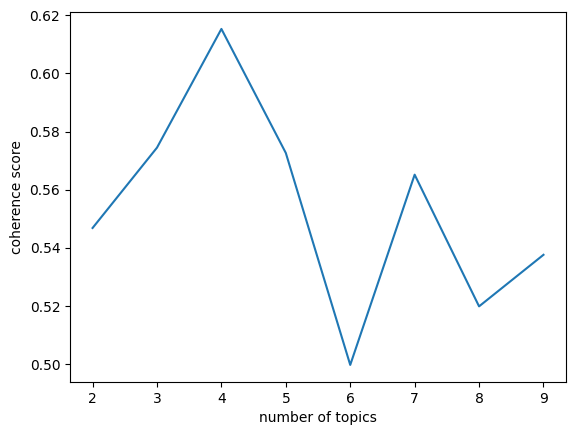

In [ ]:
x = range(2, 10)
plt.plot(x, coherence_values)
plt.xlabel('number of topics')
plt.ylabel('coherence score')
plt.show()

<h1> 5. 리뷰당 키워드 추출 </h1>

In [ ]:
!pip install keybert

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.8 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.8.3-py3-none-any.whl size=39124 sha256=82e8aff9f0db9c8ae0bb292f38be74dcd1ace273c6782fd26446576a498278da
  Stored in directory: /root/.cache/pip/wheels/70/88/07/1a3bc11fd1dd5f89924a02dcbca89a3015e25e8faa31f904dc
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=2fde3dc426b76aab765e2ae90bf371b146d125b09cbd39ae163f89db236fe2e7
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built keybert sentence-transformers


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
review_topic = pd.read_csv('./Data/Review_sentiment (Type = Order), end-to-end, topic_modeling 추가 (Updated 0107).csv')
tmp = pd.read_csv('./Data/Review_sentiment (Type = Order), end-to-end, topic_modeling 추가 (Updated 1227).csv')
review_topic['가장 높은 토픽의 비중'].mean(), tmp['가장 높은 토픽의 비중'].mean()

(0.5232043702544485, 0.48304563253826593)

In [ ]:
word_dict_list = []
for i in range(9):
    filter = review_topic[review_topic['가장 비중이 높은 토픽'] == i].reset_index(drop = True)
    word_dict = {}
    for i in range(len(filter)):
        word_list = filter.loc[i, 'morph_document'].split(' ')
        for word in word_list:
            if word in word_dict.keys():
                word_dict[word] += 1
            else:
                word_dict[word] = 1

    word_dict_list.append(word_dict)


AttributeError: 'float' object has no attribute 'split'

In [ ]:
sorted(word_dict_list[5].items(), key = lambda x : x[1], reverse = True)[:50]

[('채소', 425),
 ('사과', 293),
 ('고구마', 261),
 ('오이', 214),
 ('정말', 205),
 ('추가', 204),
 ('방울토마토', 184),
 ('토마토', 176),
 ('귤', 175),
 ('감자', 172),
 ('달', 168),
 ('키위', 151),
 ('상추', 143),
 ('과일', 139),
 ('박스', 135),
 ('처음', 134),
 ('하나', 131),
 ('양파', 129),
 ('부추', 127),
 ('야채', 125),
 ('배송', 115),
 ('품목', 112),
 ('진짜', 104),
 ('주문', 104),
 ('버섯', 98),
 ('조금', 98),
 ('다른', 96),
 ('상태', 96),
 ('고추', 84),
 ('크기', 82),
 ('미니', 80),
 ('가지', 79),
 ('구성', 78),
 ('양배추', 74),
 ('마늘', 65),
 ('생각', 63),
 ('바로', 63),
 ('제외', 62),
 ('요리', 61),
 ('유럽', 61),
 ('비트', 60),
 ('레시피', 60),
 ('무', 59),
 ('건', 58),
 ('재료', 58),
 ('나머지', 57),
 ('상품', 57),
 ('껍질', 57),
 ('온', 55),
 ('밤', 52)]

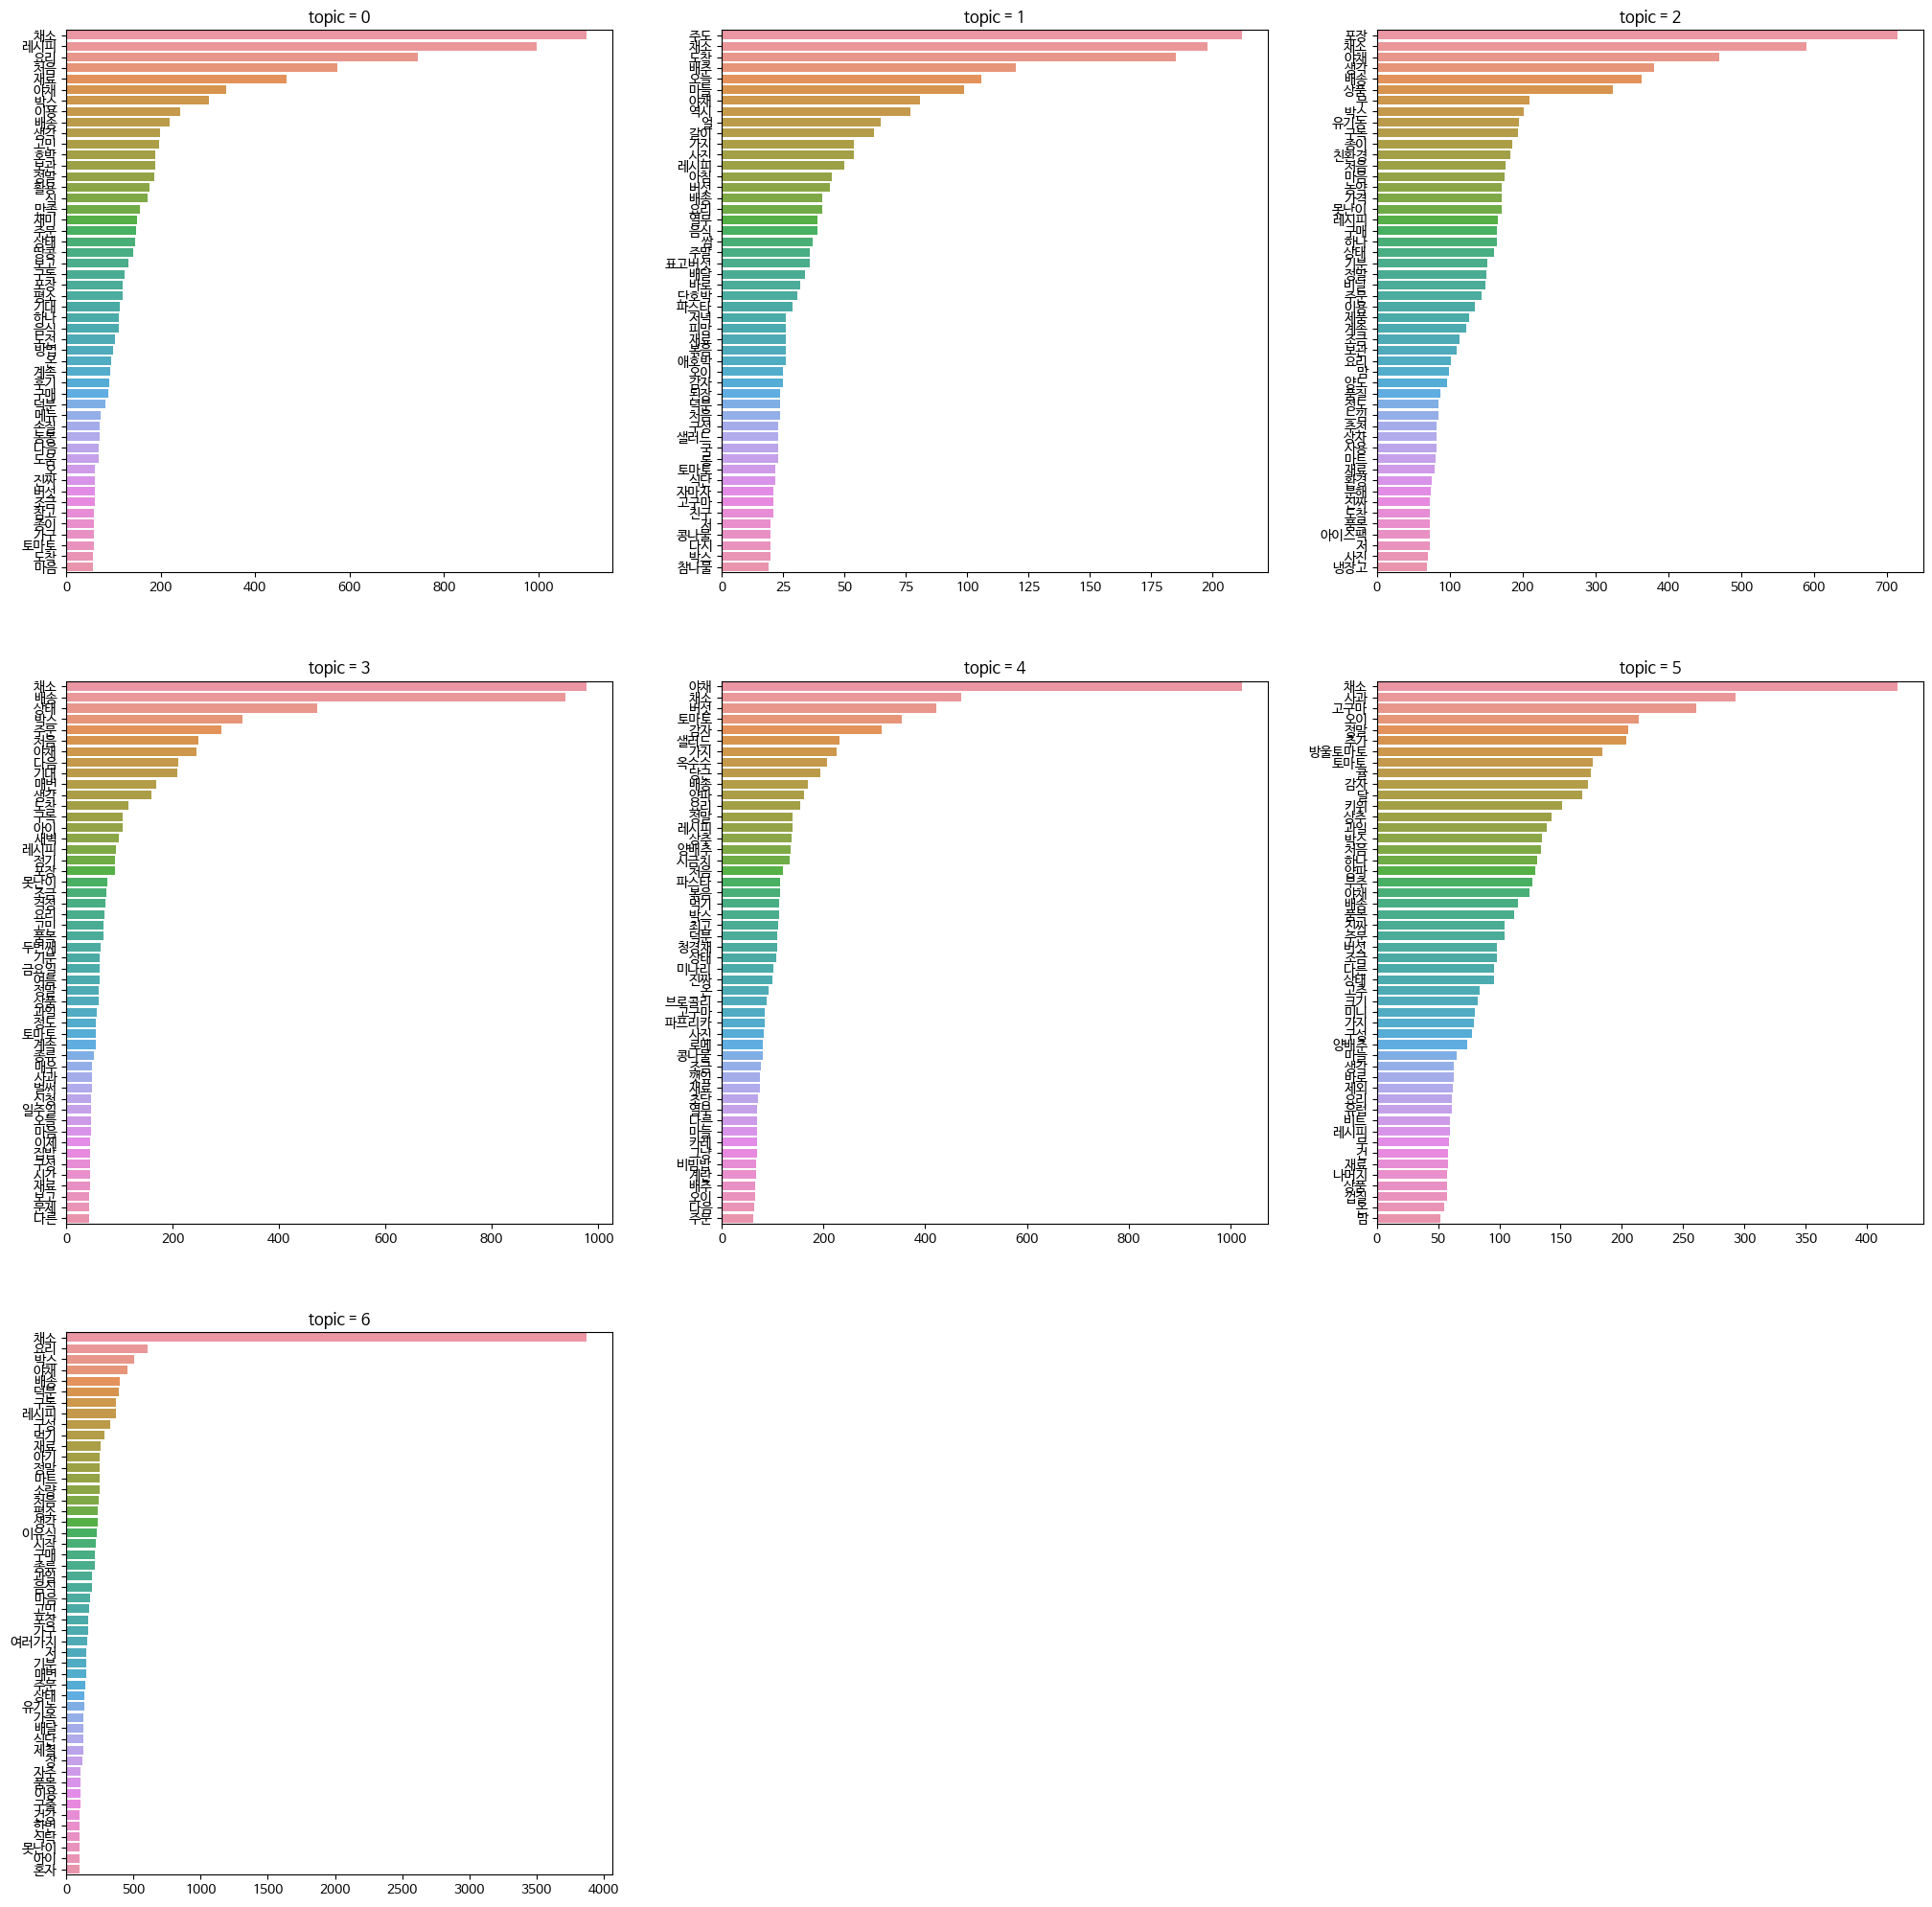

In [ ]:
plt.figure(figsize = (25, 25))

plt.rc('font', family='NanumBarunGothic')
for i in range(7):
    word_dict_reverse = sorted(word_dict_list[i].items(), key = lambda x : x[1], reverse = True)[:50]
    plt.subplot(3, 3, i+1)
    keys = [tu[0] for tu in word_dict_reverse]
    values = [tu[1] for tu in word_dict_reverse]
    sns.barplot(x = values, y = keys)
    plt.title('topic = ' + str(i))

In [ ]:
review_topic[['가장 비중이 높은 토픽', '가장 높은 토픽의 비중']][:10]

,가장 비중이 높은 토픽,가장 높은 토픽의 비중
0,3,0.4506
1,3,0.4814
2,3,0.2857
3,5,0.8279
4,6,0.5356
5,3,0.5946
6,0,0.5898
7,4,0.5714
8,5,0.8284
9,3,0.5711


In [ ]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다', '것', '엔', '접', '있다', '첫', '앞', '더', '분', '법', '차', '생', '고', '어', '글리', '어스', '알','더', '때', '집', '뜻'
, '디', '안', '수', '볼', '점', '제', '끼', '줄', '못', '데', '더', '주', '습', '날', '만', '또', '인', '양', '살', '번', '주', '점', '해', '용', '전', '청', '말', '거', '중', '순', '맛', '요', '향', '밥', '해', '더', '글', '반', '두', '제', '게', '걸', '뭐', '안', '왜', '뭘', '거', '양', '뜨', '꽤', '손', '때',
'이번', '항상', '늘', '류', '외', '구', '나', '회', '덜', '상', '마침', '모두', '해먹', '함', '총', '개', '비', '아주', '곳']
okt = Okt()

new_text = review_topic.loc[0:10]

tokenized_sentence = []
tokenized_doc = []
for sentence in tqdm(new_text['document']):
    tokenized = okt.pos(str(sentence))
    stopword_removed = [word[0] for word in tokenized if word[1] in ['Noun'] and word[0] not in stopwords]
    tokenized_sentence.append(' '.join(stopword_removed))
    tokenized_doc.append(stopword_removed)

new_text_corpus = [dictionary.doc2bow(text) for text in tokenized_doc]

topictable = make_topictable_per_doc(ldamodel3, new_text_corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

100%|██████████| 11/11 [00:00<00:00, 171.81it/s]


,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,3,0.4505,"[(0, 0.01588325), (1, 0.015924565), (2, 0.2873..."
1,1,3,0.4814,"[(0, 0.017893346), (1, 0.4292204), (2, 0.01786..."
2,2,3,0.2857,"[(0, 0.28561014), (1, 0.285674), (2, 0.0357784..."
3,3,5,0.8279,"[(0, 0.028638804), (1, 0.028611392), (2, 0.028..."
4,4,6,0.5356,"[(0, 0.035717368), (1, 0.035946514), (2, 0.285..."
5,5,3,0.5945,"[(0, 0.02869006), (1, 0.028664568), (2, 0.0286..."
6,6,0,0.5898,"[(0, 0.58984333), (1, 0.014355846), (2, 0.0143..."
7,7,4,0.5714,"[(0, 0.07142941), (1, 0.07142941), (2, 0.07142..."
8,8,5,0.8284,"[(0, 0.028638897), (1, 0.028584085), (2, 0.028..."
9,9,3,0.5711,"[(1, 0.07144469), (3, 0.5711278), (5, 0.325667..."


In [ ]:
ldamodel.save('./weight/lda topic modeling (0107).model')

In [ ]:
ldamodel3 = gensim.models.LdaModel.load('./weight/lda topic modeling (0107).model')